In [2]:
from keras.datasets import mnist
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from matplotlib import pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

model = Sequential()
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
model.summary()


Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


2023-03-04 09:38:17.476585: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-04 09:38:17.476968: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
y_TrainOneHot = np_utils.to_categorical(y_train)
y_TestOneHot = np_utils.to_categorical(y_test)

In [6]:
X_train_2D = x_train.reshape(60000, 28*28).astype('float32')
X_test_2D = x_test.reshape(10000, 28*28).astype('float32')

In [11]:
X_test_2D

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
x_Train_norm = X_train_2D/255
x_Test_norm = X_test_2D/255

In [8]:
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=800, verbose=2)



Epoch 1/10


2023-03-04 09:38:17.805997: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-04 09:38:17.929221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


60/60 - 2s - loss: 0.7793 - accuracy: 0.8070 - val_loss: 0.3268 - val_accuracy: 0.9093 - 2s/epoch - 38ms/step
Epoch 2/10


2023-03-04 09:38:20.046218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


60/60 - 0s - loss: 0.2979 - accuracy: 0.9172 - val_loss: 0.2480 - val_accuracy: 0.9319 - 435ms/epoch - 7ms/step
Epoch 3/10
60/60 - 0s - loss: 0.2332 - accuracy: 0.9352 - val_loss: 0.2051 - val_accuracy: 0.9450 - 436ms/epoch - 7ms/step
Epoch 4/10
60/60 - 0s - loss: 0.1932 - accuracy: 0.9460 - val_loss: 0.1770 - val_accuracy: 0.9506 - 434ms/epoch - 7ms/step
Epoch 5/10
60/60 - 0s - loss: 0.1626 - accuracy: 0.9546 - val_loss: 0.1576 - val_accuracy: 0.9555 - 424ms/epoch - 7ms/step
Epoch 6/10
60/60 - 0s - loss: 0.1404 - accuracy: 0.9614 - val_loss: 0.1418 - val_accuracy: 0.9588 - 419ms/epoch - 7ms/step
Epoch 7/10
60/60 - 0s - loss: 0.1219 - accuracy: 0.9664 - val_loss: 0.1303 - val_accuracy: 0.9617 - 425ms/epoch - 7ms/step
Epoch 8/10
60/60 - 0s - loss: 0.1076 - accuracy: 0.9706 - val_loss: 0.1222 - val_accuracy: 0.9642 - 432ms/epoch - 7ms/step
Epoch 9/10
60/60 - 0s - loss: 0.0953 - accuracy: 0.9737 - val_loss: 0.1133 - val_accuracy: 0.9665 - 453ms/epoch - 8ms/step
Epoch 10/10
60/60 - 0s - lo

In [9]:
scores = model.evaluate(x_Test_norm, y_TestOneHot)

  9/313 [..............................] - ETA: 2s - loss: 0.0625 - accuracy: 0.9861 

2023-03-04 09:38:24.107598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 0.1027 - accuracy: 0.9710


In [16]:
X = x_Test_norm[0:10,:]
predictions = np.argmax(model.predict(X), axis=-1)
predictions

1/1 [==============================] - 0s 11ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

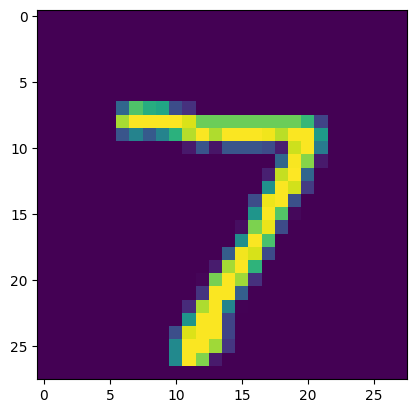

In [18]:
plt.imshow(x_test[0])
plt.show()

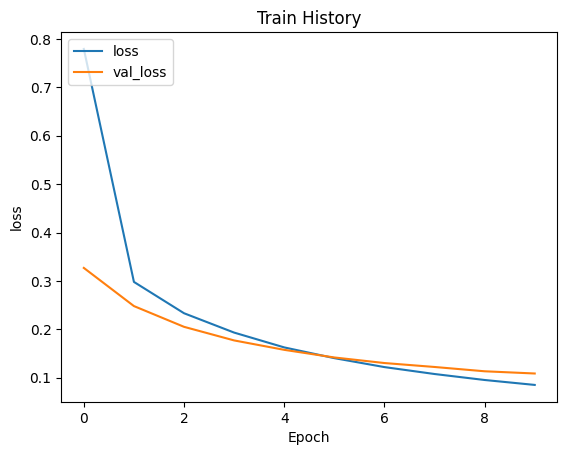

In [19]:
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Train History')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','val_loss'], loc='upper left')
plt.show()